## **Importing Libraries**


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn import preprocessing
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading and Preparing Data**

In [7]:
path_normal= '/content/drive/MyDrive/Datasets/Archive/train/NORMAL'
path_pneumonia = '/content/drive/MyDrive/Datasets/Archive/train/PNEUMONIA'
normal=os.listdir(path_normal)
pneumonia= os.listdir(path_pneumonia)

print('Normal count = ', len(normal))
print('Pneumonia count = ', len(pneumonia))

Normal count =  1341
Pneumonia count =  3891


## **Lable Data**

In [9]:
lable_normal = [0]*len(normal)
lable_pneumonia = [1]*len(pneumonia)

All_labels = lable_normal+ lable_pneumonia
print(len(lable_normal), len(lable_pneumonia), len(All_labels))

1341 3891 5232


## **Image Visualization**

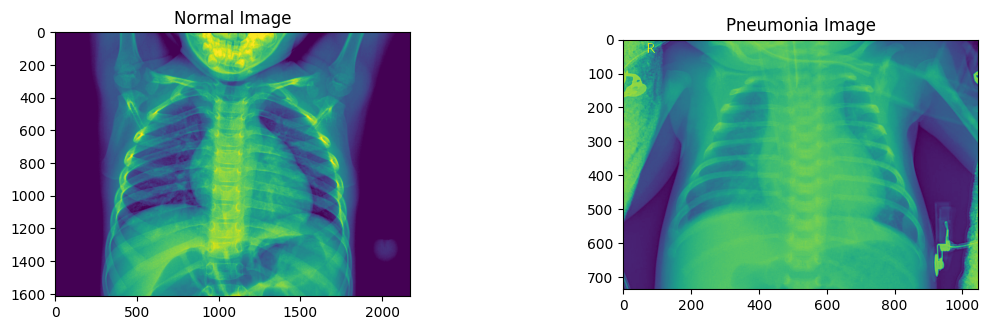

In [15]:
image_normal=  mpimg.imread(os.path.join(path_normal,'IM-0177-0001.jpeg'))
image_pneumonia = mpimg.imread(os.path.join(path_pneumonia,'person20_bacteria_66.jpeg'))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].imshow(image_normal)
axs[0].set_title('Normal Image')


axs[1].imshow(image_pneumonia)
axs[1].set_title('Pneumonia Image')
plt.tight_layout()
plt.subplots_adjust(wspace=0.6)
plt.show()


## **Image Processing**

In [20]:
data = []

for img_file in normal:
    image=Image.open(path_normal+'/'+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

for img_file in pneumonia:
    image=Image.open(path_pneumonia+'/' +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

type(data)
len(data)


5232

## **Data Conversion**

In [21]:

X = np.array(data)
Y = np.array(All_labels)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 33)



## **Data Scaling**

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

## **CNN Model Definition**

In [23]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

## **Model Compilation**

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)



## **Model Training**

In [25]:
history = model.fit(X_train_scaled,Y_train, validation_split = 0.1, verbose = 1, epochs = 5)

Epoch 1/5
118/118 [==============================] - 135s 1s/step - loss: 0.3399 - acc: 0.8537 - val_loss: 0.1958 - val_acc: 0.9403
Epoch 2/5
118/118 [==============================] - 141s 1s/step - loss: 0.1345 - acc: 0.9503 - val_loss: 0.1700 - val_acc: 0.9523
Epoch 3/5
118/118 [==============================] - 139s 1s/step - loss: 0.1059 - acc: 0.9602 - val_loss: 0.1393 - val_acc: 0.9523
Epoch 4/5
118/118 [==============================] - 132s 1s/step - loss: 0.0764 - acc: 0.9711 - val_loss: 0.1477 - val_acc: 0.9570
Epoch 5/5
118/118 [==============================] - 136s 1s/step - loss: 0.0636 - acc: 0.9780 - val_loss: 0.1395 - val_acc: 0.9499


## **Model Evaluation**

In [26]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)

33/33 [==============================] - 13s 399ms/step - loss: 0.0876 - acc: 0.9685


## **Testing with Test Images**

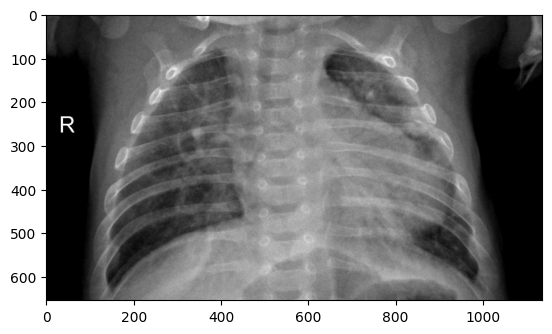

1/1 [==============================] - 0s 32ms/step
Prediction Probabilities: [[0.00562346 0.9996366 ]]
Pneumonia


In [33]:
image = cv2.imread('/content/drive/MyDrive/Datasets/Archive/test/PNEUMONIA/person1_virus_13.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

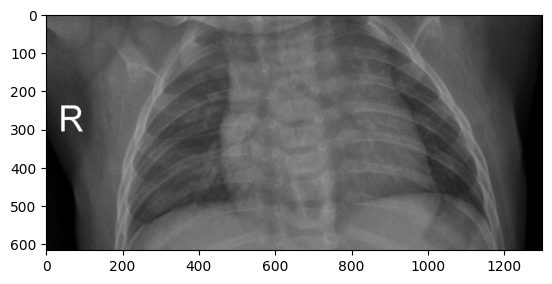

1/1 [==============================] - 0s 33ms/step
Prediction Probabilities: [[0.06014773 0.98970485]]
Pneumonia


In [31]:
image = cv2.imread('/content/drive/MyDrive/Datasets/Archive/test/NORMAL/IM-0022-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

Here the model shows wrong output.It predicted Pneumonia where the person was normal.

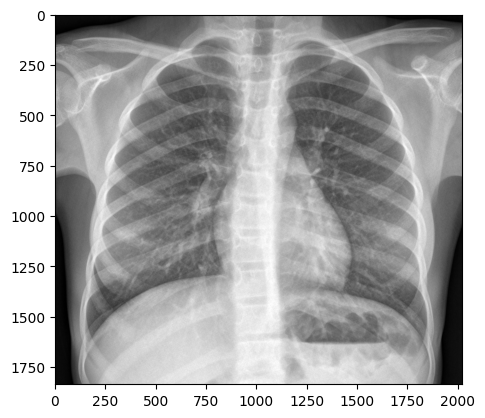

1/1 [==============================] - 0s 30ms/step
Prediction Probabilities: [[0.58460855 0.5437334 ]]
Normal


In [36]:
image = cv2.imread('/content/drive/MyDrive/Datasets/Archive/test/NORMAL/IM-0033-0001-0002.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

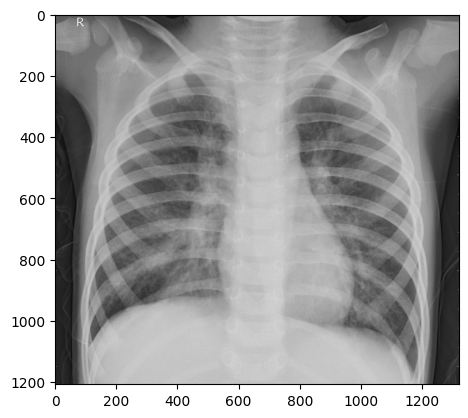

1/1 [==============================] - 0s 170ms/step
Prediction Probabilities: [[0.29778734 0.8676315 ]]
Pneumonia


In [34]:
image = cv2.imread('/content/drive/MyDrive/Datasets/Archive/test/PNEUMONIA/person20_virus_51.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

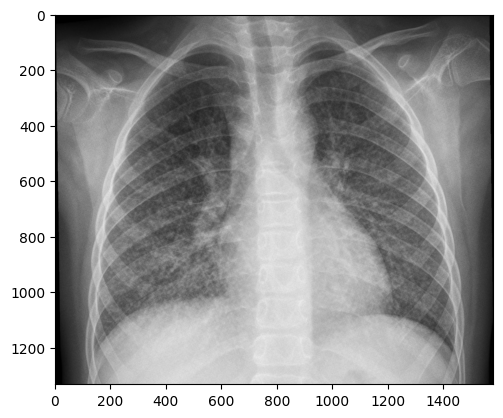

1/1 [==============================] - 0s 33ms/step
Prediction Probabilities: [[0.3677538 0.7917156]]
Pneumonia


In [35]:
image = cv2.imread('/content/drive/MyDrive/Datasets/Archive/test/PNEUMONIA/person16_virus_47.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

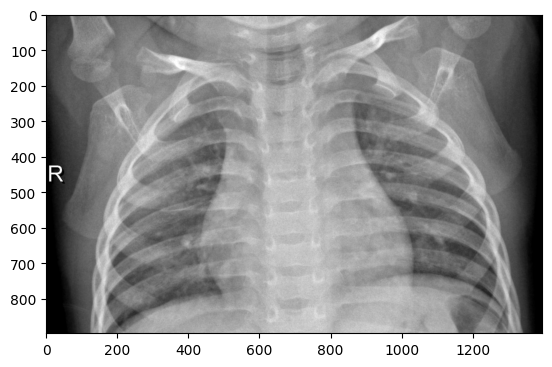

1/1 [==============================] - 0s 30ms/step
Prediction Probabilities: [[0.2600171  0.90394646]]
Pneumonia


In [37]:
image = cv2.imread('/content/drive/MyDrive/Datasets/Archive/test/NORMAL/NORMAL2-IM-0290-0001.jpeg')
plt.imshow(image)
plt.show()
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0
image_reshaped = np.reshape(image_normalized, (1, 128, 128, 3))
prediction = model.predict(image_reshaped)
print("Prediction Probabilities:", prediction)
predicted_label = np.argmax(prediction)

if predicted_label == 1:
  print('Pneumonia')
else:
  print('Normal')

Here the model shows wrong output.It predicted Pneumonia where the person was normal.